# 1 - Camera calibration

1- Import the necessary libraries

In [1]:
import camera_cal_helper as cal
import glob
import cv2
%matplotlib inline

2 - Apply calibration to provided images

In [2]:
#Get object points (same for all images)
nx=9
ny=6
obj=cal.object_points(nx,ny)

#Create the image points and object points list
img_points=[]
obj_points=[]

for fname in glob.glob('camera_cal/calibration*.jpg'):
    #print(fname)
    #Read image
    img=cv2.imread(fname)
    #plt.imshow(img)
    #Find image points
    ret, corners = cal.find_corners_chessbooard(img,nx,ny,0)
    #print (ret)
    #Add points to list
    if ret:
        img_points.append(corners)
        obj_points.append(obj)


3- Undistort example image

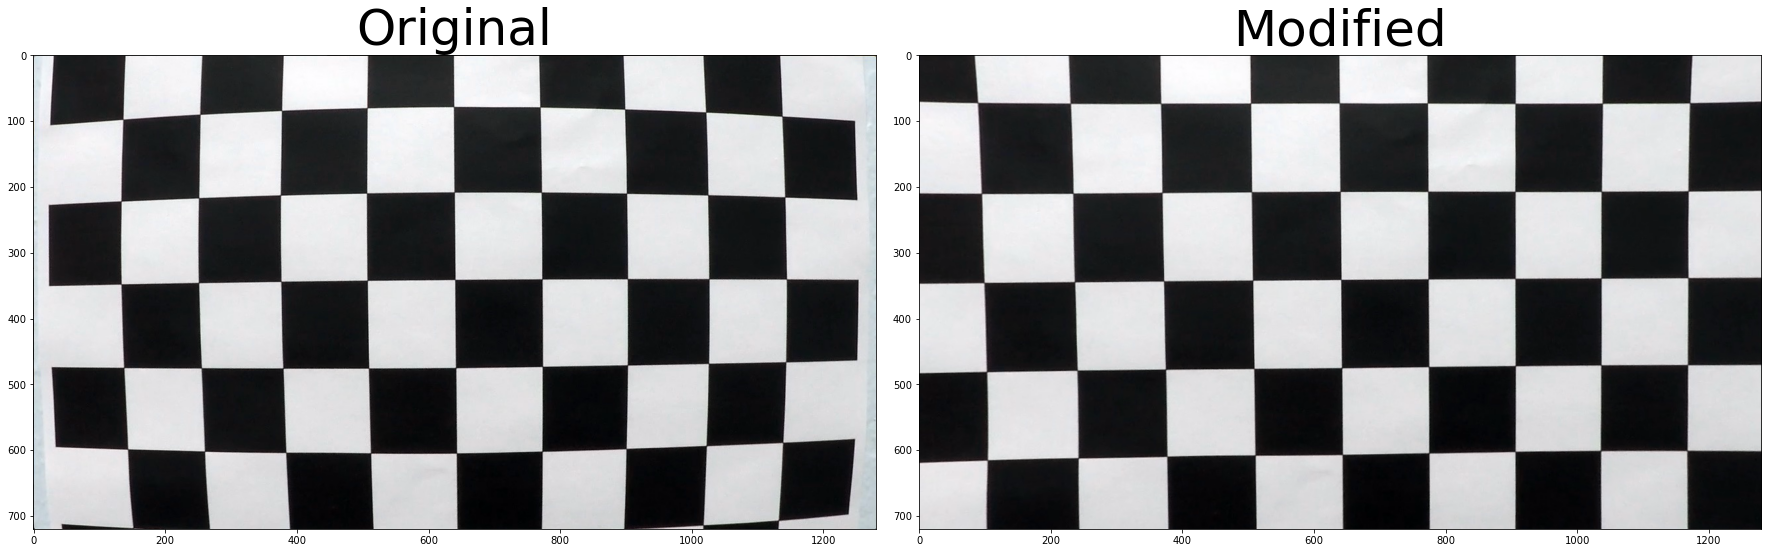

In [3]:
#Select example figure
example_image=cv2.imread('camera_cal/calibration1.jpg')
#Undistort figure
undistorted_example=cal.cal_undistort(example_image, obj_points, img_points)
#Plot and save for markup
cal.compare_images(example_image, undistorted_example, 1, 'images_for_writeup/undistorted_chess_board')

# 2- Pipeline (test images)

## 2.1 - Apply distortion correction to every image

In [4]:
for fname in glob.glob('test_images/*.jpg'):
    #Read image
    img=cv2.imread(fname)
    #Undistort image
    undistorted=cal.cal_undistort(img, obj_points, img_points)
    #Save images to output folder
    output_file_name='output_images/'+fname[12:-4]+'_undistorted.jpg'
    status = cv2.imwrite(output_file_name,undistorted)
    #Check if everything went well
    if not status:
        print('image not saved')


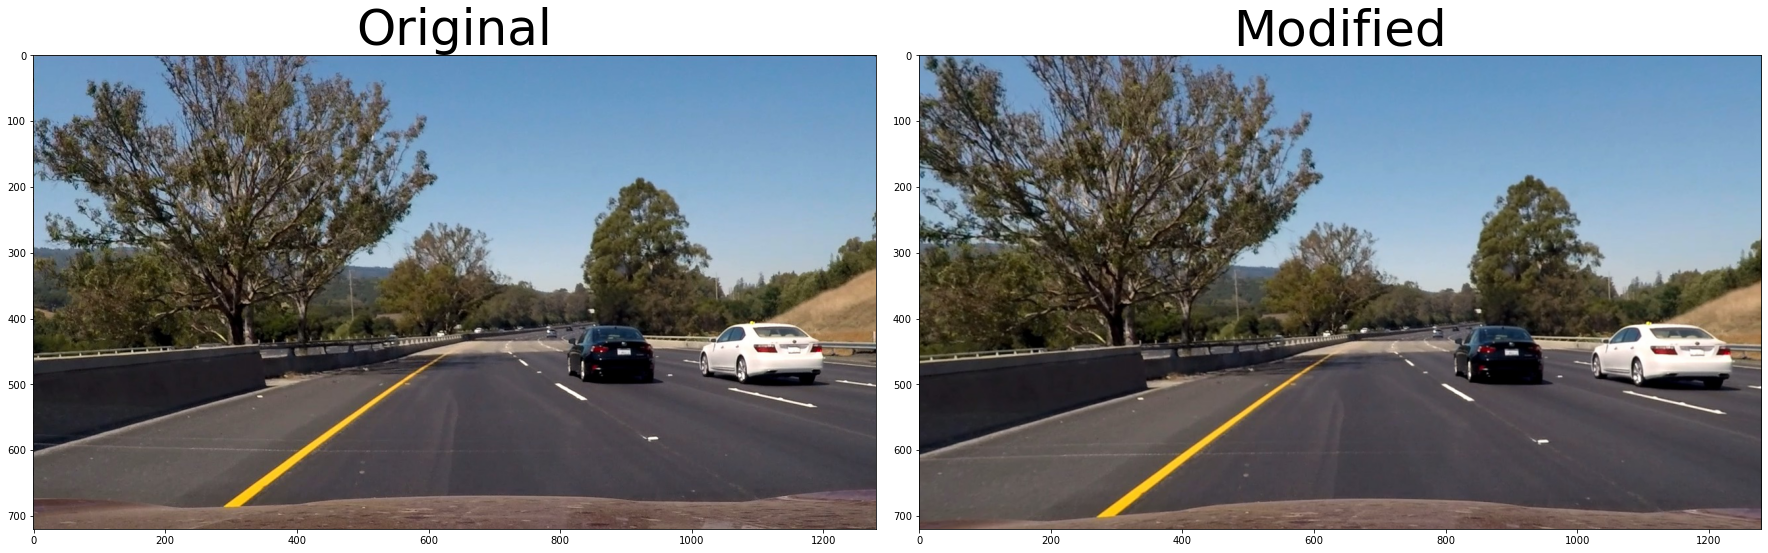

In [5]:
#Example image (last one) for writeup
cal.compare_images(img, undistorted, 1, 'images_for_writeup/distortion_correction_lanes', 1)